**1. Install Libraries**

In [1]:
!pip install pandas scikit-learn imbalanced-learn

**2. Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import joblib
import os

**3. Load Dataset**

In [4]:
df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**4. Split Features and Labels**

In [5]:
X = df.drop("Class", axis=1)   # Features
y = df["Class"]

**5. Balance Dataset using SMOTE**

In [6]:
# Class Distribution Before SMOTE
print("\nClass distribution before SMOTE:")
print(y.value_counts())

# Balance Dataset using SMOTE
print("\nApplying SMOTE to balance the dataset...")
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Class Distribution After SMOTE
print("\nAfter SMOTE. Class distribution:")
print(pd.Series(y_resampled).value_counts())


Class distribution before SMOTE:
Class
0    284315
1       492
Name: count, dtype: int64

Applying SMOTE to balance the dataset...

After SMOTE. Class distribution:
Class
0    284315
1    284315
Name: count, dtype: int64


**6. Split into Train/Test**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

**7. Train Random Forest Model**

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**8. Evaluate Model**


Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Accuracy: 99.99%


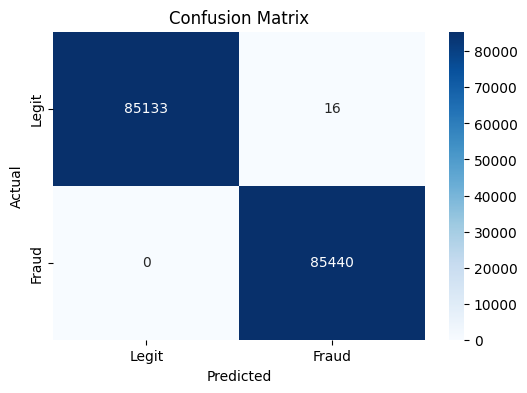

In [12]:
y_pred = model.predict(X_test)
print("\nModel Evaluation:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**9. Save the Model**

In [13]:
joblib.dump(model, "fraud_model_rf.pkl")
print("\nModel saved as 'fraud_model_rf.pkl'")


Model saved as 'fraud_model_rf.pkl'


**10. Command-Line Testing Interface**

In [19]:
def predict_transaction():
    print("\n🧪 Test the Fraud Detection System")
    model = joblib.load("fraud_model_rf.pkl")

    print("Enter 30 features (Time, V1-V28, Amount) one by one:")
    inputs = []
    for i in range(30):
        val = float(input(f"Feature {i+1}: "))
        inputs.append(val)

    features = np.array(inputs).reshape(1, -1)
    prediction = model.predict(features)

    if prediction[0] == 1:
        print("🚨 This transaction is FRAUDULENT.")
    else:
        print("✅ This transaction is LEGITIMATE.")

predict_transaction()


🧪 Test the Fraud Detection System
Enter 30 features (Time, V1-V28, Amount) one by one:
Feature 1: 12
Feature 2: -0.75242
Feature 3: 0.345485
Feature 4: 2.057323
Feature 5: -1.46864
Feature 6: -1.15839
Feature 7: -0.07785
Feature 8: -0.60858
Feature 9: 0.003603
Feature 10: -0.43617
Feature 11: 0.747731
Feature 12: -0.79398
Feature 13: -0.77041
Feature 14: 1.047627
Feature 15: -1.0666
Feature 16: 1.106953
Feature 17: 1.660114
Feature 18: -0.27927
Feature 19: -0.41999
Feature 20: 0.432535
Feature 21: 0.263451
Feature 22: 0.499625
Feature 23: 1.35365
Feature 24: -0.25657
Feature 25: -0.06508
Feature 26: -0.03912
Feature 27: -0.08709
Feature 28: -0.181
Feature 29: 0.129394
Feature 30: 15.99
✅ This transaction is LEGITIMATE.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
